<a href="https://colab.research.google.com/github/tarunbalajiks/Speech-Emotion-Recognition/blob/main/FeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
''' Importing Required Libraries '''

import os
import time
import joblib
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [8]:
SAMPLE_FILE_PATH = '/content/drive/MyDrive/vocal_dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav'

In [12]:
''' Loading sample audio file '''

X, sample_rate = librosa.load(SAMPLE_FILE_PATH, sr=None)
result = np.array([])

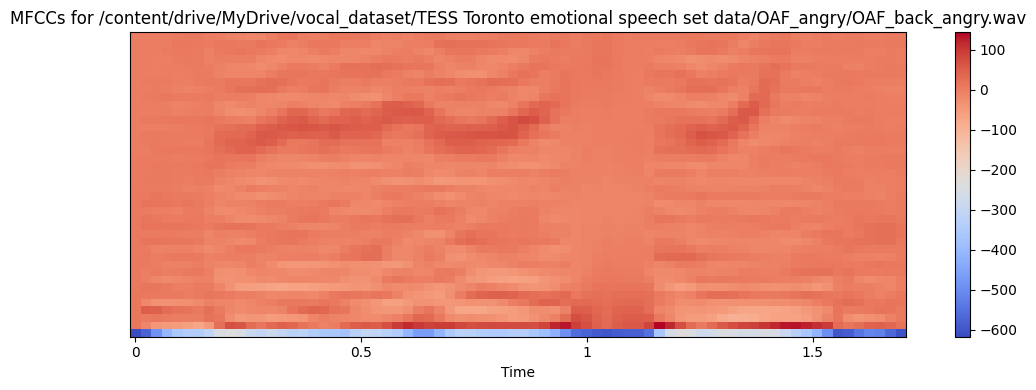

In [13]:
''' Extracting MFCCs '''

mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
result = np.hstack((result, mfccs))

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40), x_axis='time')
plt.colorbar()
plt.title('MFCCs for {}'.format(SAMPLE_FILE_PATH))
plt.tight_layout()
plt.show()


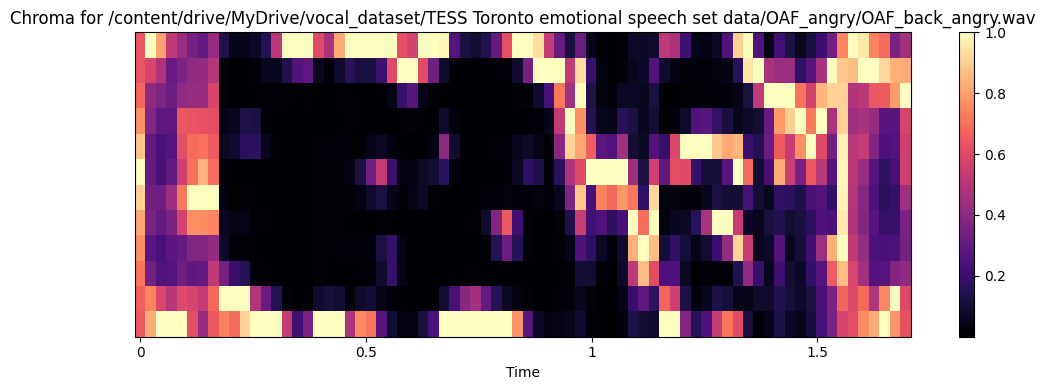

In [15]:
''' Extracting Chroma '''

chroma = np.mean(librosa.feature.chroma_stft(y=X, sr=sample_rate).T, axis=0)
result = np.hstack((result, chroma))

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.feature.chroma_stft(y=X, sr=sample_rate), x_axis='time')
plt.colorbar()
plt.title('Chroma for {}'.format(SAMPLE_FILE_PATH))
plt.tight_layout()
plt.show()

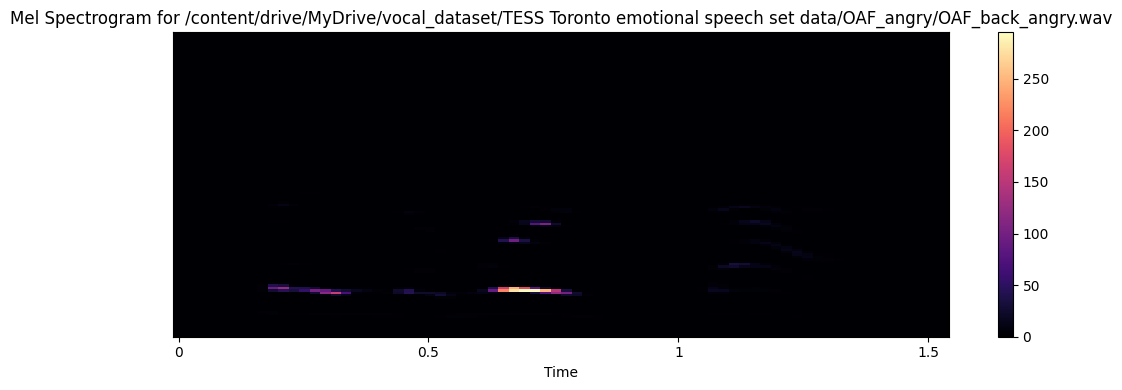

In [17]:
''' Extracting Mel Spectrogram '''
mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
result = np.hstack((result, mel))

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.feature.melspectrogram(y=X, sr=sample_rate), sr=sample_rate, x_axis='time', fmax=sample_rate/2)
plt.colorbar()
plt.title('Mel Spectrogram for {}'.format(SAMPLE_FILE_PATH))
plt.tight_layout()
plt.show()

In [6]:
''' Extracting Required Features from Audio Files as Saving '''

print("Data Extraction Started")
lst = []

for subdir, dirs, files in os.walk(DATA_PATH):
    for file in files:
        try:
            X, sample_rate = librosa.load(os.path.join(subdir, file), res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)

            file = int(file[7:8]) - 1
            arr = mfccs, file
            lst.append(arr)

        except ValueError as err:
            print(err)
            continue


X, y = zip(*lst)

# Array conversion
X, y = np.asarray(X), np.asarray(y)

# Preparing features dump
X_name, y_name = 'X.joblib', 'y.joblib'

joblib.dump(X, os.path.join(SAVE_DIR_PATH, X_name))
joblib.dump(y, os.path.join(SAVE_DIR_PATH, y_name))

print("Featured Extraction Completed\nStored at",SAVE_DIR_PATH)

Data Extraction Started
Featured Extraction Completed
Stored at  /content/drive/MyDrive/vocal_dataset
